In [16]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import integrate

In [2]:
# Open datasets

data_20 = pd.read_csv('../data/img_scout_dfs/2020/INC_coreg_skysat_scout_2020.csv')
data_21 = pd.read_csv('../data/img_scout_dfs/2021/INC_skysat_scout_2021.csv')
data_22 = pd.read_csv('../data/img_scout_dfs/2022/INC_skysat_scout_2022.csv')

In [3]:
dfs = [data_20, data_21, data_22]

In [4]:
# Add VIs
def add_vis(df):
    df['ndvi']= (df['nir']-df['red'])/(df['nir']+df['red'])
    df['evi']= 2.5*(df['nir']-df['red'])/(df['nir']+6*df['red']-7.5*df['blue']+1)
    df['savi']= 1.5*(df['nir']-df['red'])/(df['nir']+df['red']+0.5)
    df['arvi']=(df['nir']-(2*df['red']-df['blue']))/(df['nir']+(2*df['red']-df['blue']))
    df['grvi']=(df['green']-df['red'])/(df['green']+df['red'])
    df['bgvi'] = df['blue']-df['green']/df['blue']+df['green']
    df['gcc']=df['green']/(df['green']+df['red']+df['blue'])
    df['gri']=df['green']/df['red']
    #df['sr']= df['nir']/df['red']
    #df['msr']= ((df['nir']/df['red'])-1)/(np.sqrt((df['nir']/df['red'])+1))
    #df['dvi']= df['nir']-df['red']
    #df['nirv']= df['ndvi']*df['nir']
    #df['tvi']=0.5*(120*(df['nir']-df['green'])-200*(df['red']-df['green']))
    return df

In [5]:
for df in dfs:
    add_vis(df)

# Figure 1

## Average gdm severity vs. time for all 3 years
## 6 lines
* 3 for UTC - always treatment 1
* 3 for com. std. (Revus?)
 - 2022  - Revus - treatment 2
 - 2021 - Revus - treatment 2
 - 2020 - Revus - ?

In [20]:
scout_20 = pd.read_csv('../data/scout/scout_2020_gdf.csv')
scout_21 = pd.read_csv('../data/scout/scout_2021_gdf.csv')
scout_22 = pd.read_csv('../data/scout/scout_2022_gdf.csv')

scout_data = [scout_20, scout_21, scout_22]

In [8]:
# Get each line as a series

# 2020 - Treatment X

#cs_20 = dfs[0].loc[dfs['Treatment']==X]

# 2020 - UTC
utc_20 = scout_20.loc[scout_20['Treatment']==1]
#utc_20.head()
# 2021 - Treatment X
# 2021 - UTC
utc_21 = scout_21.loc[scout_21['Treatment']==1]
utc_21.head()
# 2022 - Treatment X
# 2022 - UTC
utc_22 = scout_22.loc[scout_22['Treatment']==1]
utc_22.head()

,Date,Row,Panel,Treatment,Block,PM_severity,DM_severity,total_dis,geometry,centroid
14,2022-06-22,1,15,1,PM,0.0,0.15,1.90,POLYGON ((-77.01648440419838 42.87853020926388...,POINT (-77.01652649030365 42.87854320864258)
54,2022-06-22,5,4,1,PM,0.0,0.10,1.75,POLYGON ((-77.01553102784763 42.87844998993179...,POINT (-77.01557395530281 42.878462798620625)
85,2022-06-22,7,6,1,DM,0.0,0.00,0.70,POLYGON ((-77.0157081569415 42.878530719764086...,POINT (-77.01575141030301 42.87854335362472)
99,2022-06-22,8,4,1,DM,0.0,0.75,1.80,POLYGON ((-77.01553524297242 42.87852313090479...,POINT (-77.01557783030286 42.87853568362073)
134,2022-06-22,10,7,1,DM,0.0,0.00,1.80,POLYGON ((-77.01579778903982 42.87862066016371...,POINT (-77.01583847530308 42.87863306362672)


In [9]:
utcs = pd.concat([utc_20, utc_21, utc_22])
utcs.head()

,Date,Row,Panel,Treatment,Block,PM_severity,DM_severity,total_dis,geometry,centroid
37,2020-06-18,4,11,1.0,PM,0.0,0.00,0.0,POLYGON ((-77.01614105169733 42.87854079067705...,POINT (-77.0161816653034 42.87855322363464)
52,2020-06-18,7,4,1.0,DM,0.0,0.00,0.6,POLYGON ((-77.01553423695294 42.87849768976214...,POINT (-77.01557651030285 42.878510168620686)
99,2020-06-18,10,15,1.0,DM,0.0,0.05,0.9,POLYGON ((-77.0164900489943 42.878753010171465...,POINT (-77.01652978530375 42.878765158642686)
109,2020-06-25,1,13,1.0,PM,0.0,0.00,5.1,"POLYGON ((-77.0163126942097 42.87849793926196,...",POINT (-77.01635462530355 42.878510508638634)
117,2020-06-25,2,7,1.0,PM,0.0,0.00,0.0,POLYGON ((-77.01578994360328 42.87842550725146...,POINT (-77.0158305553031 42.878437623626546)


In [10]:
utcs['year'] = ''
utcs['year'] = utcs['Date'].str[:4]
utcs

,Date,Row,Panel,Treatment,Block,PM_severity,DM_severity,total_dis,geometry,centroid,year
37,2020-06-18,4,11,1.0,PM,0.0,0.00,0.0,POLYGON ((-77.01614105169733 42.87854079067705...,POINT (-77.0161816653034 42.87855322363464),2020
52,2020-06-18,7,4,1.0,DM,0.0,0.00,0.6,POLYGON ((-77.01553423695294 42.87849768976214...,POINT (-77.01557651030285 42.878510168620686),2020
99,2020-06-18,10,15,1.0,DM,0.0,0.05,0.9,POLYGON ((-77.0164900489943 42.878753010171465...,POINT (-77.01652978530375 42.878765158642686),2020
109,2020-06-25,1,13,1.0,PM,0.0,0.00,5.1,"POLYGON ((-77.0163126942097 42.87849793926196,...",POINT (-77.01635462530355 42.878510508638634),2020
117,2020-06-25,2,7,1.0,PM,0.0,0.00,0.0,POLYGON ((-77.01578994360328 42.87842550725146...,POINT (-77.0158305553031 42.878437623626546),2020
...,...,...,...,...,...,...,...,...,...,...,...
1744,2022-08-09,11,2,1.0,DM,NaN,43.75,NaN,POLYGON ((-77.01535983522211 42.87856351942991...,POINT (-77.0154016703026 42.87857624861663),2022
1780,2022-08-29,7,6,1.0,DM,NaN,45.00,NaN,POLYGON ((-77.0157081569415 42.878530719764086...,POINT (-77.01575141030301 42.87854335362472),2022
1803,2022-08-29,8,13,1.0,DM,NaN,56.00,NaN,POLYGON ((-77.01631446292114 42.87867068091347...,POINT (-77.0163559653036 42.878683138638664),2022
1832,2022-08-29,10,10,1.0,DM,NaN,31.00,NaN,POLYGON ((-77.01605999902254 42.87867018016665...,POINT (-77.0161013453033 42.878682743632794),2022


In [11]:
# Remove year from dates

#utcs.Date.iloc[0]
utcs['Date'] = utcs['Date'].str[-5:]

In [43]:
utcs.Date.unique()

array(['06-18', '06-25', '07-01', '07-09', '07-15', '07-21', '07-30',
       '08-06', '08-13', '08-20', '06-24', '07-07', '07-27', '08-03',
       '08-10', '08-17', '06-22', '06-29', '07-06', '07-14', '07-20',
       '08-02', '08-09', '08-29'], dtype=object)

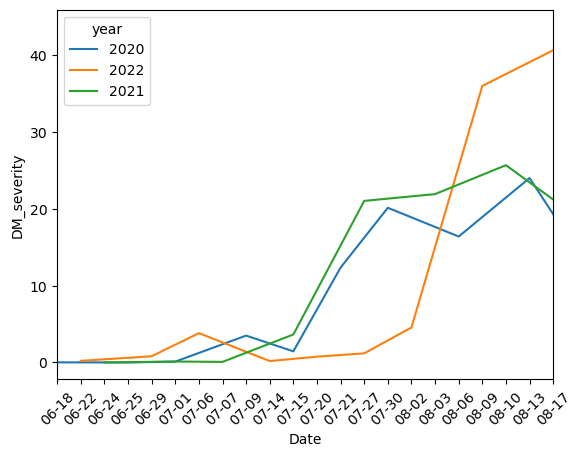

In [12]:
utcs_ordered = utcs.sort_values(by='Date')
sns.lineplot(data=utcs_ordered, x='Date', y='DM_severity', hue = 'year', errorbar=None)
plt.xticks(rotation=45)
plt.xlim('06-18', '08-17')

plt.show()

In [13]:
def add_audpc(df, date_col, dis_col):
    
    '''Inputs:
    df (pandas dataframe) - dataframe with dates and disease ratings
    date_col (str) - name of the column containing dates
    dis_col (str) - name of the column containing disease ratings
    '''
    
    #Calculate AUDPC for each date
    
    x_vals = df[date_col]
    
    y_vals = df[dis_col]
    
    # for more on trapezoidal integration, 
    # see https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.cumulative_trapezoid.html
    
    integrals = integrate.cumulative_trapezoid(y_vals, x_vals, initial=0)
    
    #Add audpc column to original dataframe
    df['audpc'] = integrals
    
    #return df

def panel_audpc(df, date_col, dis_col):
    
    #Convert date from str to datetime
    as_datetime = pd.to_datetime(df[date_col], infer_datetime_format=True)
    
    #Convert dates to DOY
    day_of_year = np.asarray([d.timetuple().tm_yday for d in as_datetime])
    
    # Subtract first date from all dates to scale the AUDPC calculation
    scaled = np.asarray([d-day_of_year.min() for d in day_of_year])
    
    # Add column for DOY
    df['doy'] = scaled
    
    #group by geometry 
    geometries = df.geometry.unique()
    panel_dfs=[]
    
    for g in geometries:
        panel_df = df[df['geometry']==g]
        panel_dfs.append(panel_df)
    
    for p in panel_dfs:
        add_audpc(p, 'doy', dis_col)
    
    #recombine the dataframes
    
    recomb = pd.concat(panel_dfs).sort_values(by=['Date', 'Row', 'Panel'])
    
    return recomb

In [23]:
auc_dfs = []
for i in scout_data:
    df = panel_audpc(i, 'Date', 'DM_severity')
    auc_dfs.append(df)
len(auc_dfs)

/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_1211/511571274.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['audpc'] = integrals
/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_1211/511571274.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['audpc'] = integrals
/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_1211/511571274.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

3

In [24]:
# Get each line as a series

# 2020 - Treatment 2

#cs_20 = utc_dfs[0].loc[auc_dfs['Treatment']==2]

# 2020 - UTC
utc_20 = auc_dfs[0].loc[auc_dfs[0]['Treatment']==1]

# 2021 - Treatment 2
#cs_20 = utc_dfs[1].loc[auc_dfs['Treatment']==2]

# 2021 - UTC
utc_21 = auc_dfs[1].loc[auc_dfs[1]['Treatment']==1]

# 2022 - Treatment 2
#cs_20 = utc_dfs[2].loc[auc_dfs['Treatment']==2]

# 2022 - UTC
utc_22 = auc_dfs[2].loc[auc_dfs[2]['Treatment']==1]


,Date,Row,Panel,Treatment,Block,PM_severity,DM_severity,total_dis,geometry,centroid,doy,audpc
14,2022-06-22,1,15,1,PM,0.0,0.15,1.90,POLYGON ((-77.01648440419838 42.87853020926388...,POINT (-77.01652649030365 42.87854320864258),0,0.0
54,2022-06-22,5,4,1,PM,0.0,0.10,1.75,POLYGON ((-77.01553102784763 42.87844998993179...,POINT (-77.01557395530281 42.878462798620625),0,0.0
85,2022-06-22,7,6,1,DM,0.0,0.00,0.70,POLYGON ((-77.0157081569415 42.878530719764086...,POINT (-77.01575141030301 42.87854335362472),0,0.0
99,2022-06-22,8,4,1,DM,0.0,0.75,1.80,POLYGON ((-77.01553524297242 42.87852313090479...,POINT (-77.01557783030286 42.87853568362073),0,0.0
134,2022-06-22,10,7,1,DM,0.0,0.00,1.80,POLYGON ((-77.01579778903982 42.87862066016371...,POINT (-77.01583847530308 42.87863306362672),0,0.0


In [25]:
utcs = pd.concat([utc_20, utc_21, utc_22])
utcs['year'] = ''
utcs['year'] = utcs['Date'].str[:4]
utcs['Date'] = utcs['Date'].str[-5:]

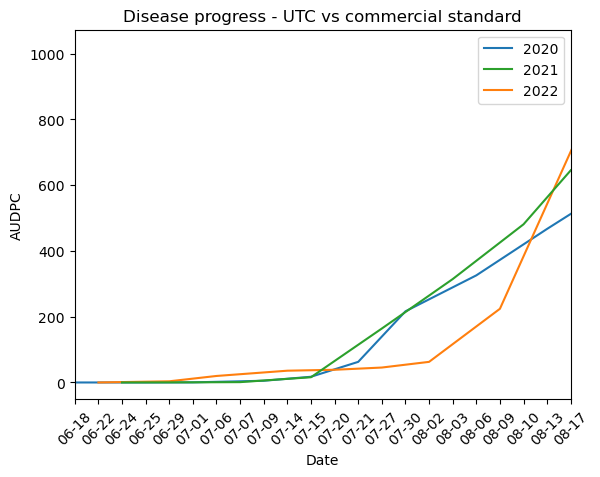

In [33]:
utcs_ordered = utcs.sort_values(by='Date')
sns.lineplot(data=utcs_ordered, x='Date', y='audpc', hue = 'year', errorbar=None)
plt.xticks(rotation=45)
plt.xlim('06-18', '08-17')
plt.ylabel('AUDPC')
plt.title('Disease progress - UTC vs commercial standard')
# reordering the labels
handles, labels = plt.gca().get_legend_handles_labels()
  
# specify order
order = [0,2,1]
  
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order])
plt.show()


In [71]:
concatted = pd.concat(auc_dfs)
subset = concatted[concatted['Treatment']<=2]
subset['year'] = ''
subset['year'] = subset['Date'].str[:4]
subset['Date'] = subset['Date'].str[-5:]
subset.head()

/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_1211/4020722721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['year'] = ''
/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_1211/4020722721.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['year'] = subset['Date'].str[:4]
/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_1211/4020722721.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,Date,Row,Panel,Treatment,Block,PM_severity,DM_severity,total_dis,geometry,centroid,doy,audpc,year
4,06-18,1,6,2.0,PM,0.0,0.00,5.65,"POLYGON ((-77.01570014425 42.878381989255075, ...",POINT (-77.01574402030295 42.87839504362453),0,0.0,2020
5,06-18,1,6,2.0,PM,0.0,0.00,2.00,"POLYGON ((-77.01570014425 42.878381989255075, ...",POINT (-77.01574402030295 42.87839504362453),0,0.0,2020
37,06-18,4,11,1.0,PM,0.0,0.00,0.00,POLYGON ((-77.01614105169733 42.87854079067705...,POINT (-77.0161816653034 42.87855322363464),0,0.0,2020
52,06-18,7,4,1.0,DM,0.0,0.00,0.60,POLYGON ((-77.01553423695294 42.87849768976214...,POINT (-77.01557651030285 42.878510168620686),0,0.0,2020
56,06-18,7,9,2.0,DM,0.0,0.05,3.65,"POLYGON ((-77.01596918692431 42.878579619767, ...",POINT (-77.01601220530323 42.87859241863073),0,0.0,2020


In [72]:
subset.loc[subset['Treatment']==2, 'Treatment']= 'commercial standard'
subset.loc[subset['Treatment']==1, 'Treatment']= 'UTC'


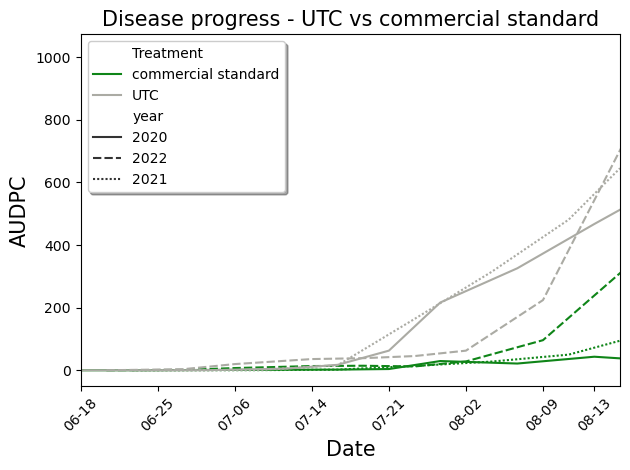

In [90]:
subset_ordered = subset.sort_values(by='Date')
sns.lineplot(data=subset_ordered, x='Date', y='audpc', 
             hue = 'Treatment', style = 'year', 
             palette = ["#0F8518", "#ABABA4"],
             errorbar=None)
ticks = ['06-18', '06-25', '07-06', '07-14', '07-21', '08-02', '08-09','08-13']
plt.xticks(ticks, rotation=45)
plt.xlim('06-18', '08-17')
plt.ylabel('AUDPC', fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.title('Disease progress - UTC vs commercial standard', fontsize=15)



plt.legend(shadow=True)
plt.tight_layout()
#plt.show()

plt.savefig('audpc.svg')

In [6]:
low_sev_20 = data_20[data_20['DM_severity']<=10]
low_sev_20.DM_severity.max()
high_sev_20 = data_20[data_20['DM_severity']>10]

Text(0.5, 1.0, 'DM incidence - Low severity panels, 2020')

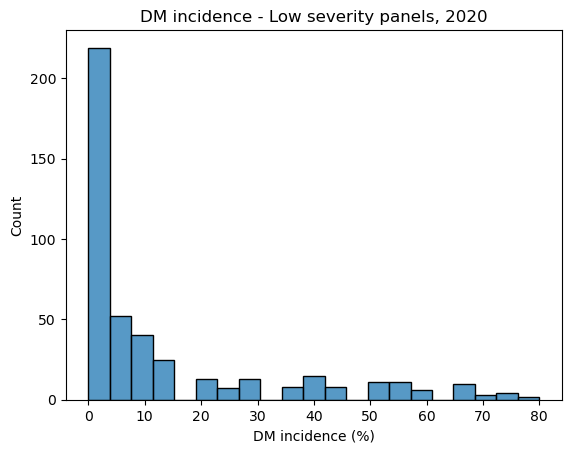

In [7]:
sns.histplot(data=low_sev_20, x='DM_inc')
plt.xlabel('DM incidence (%)')
plt.ylabel('Count')
plt.title('DM incidence - Low severity panels, 2020')


Text(0.5, 1.0, 'DM incidence - High severity panels, 2020')

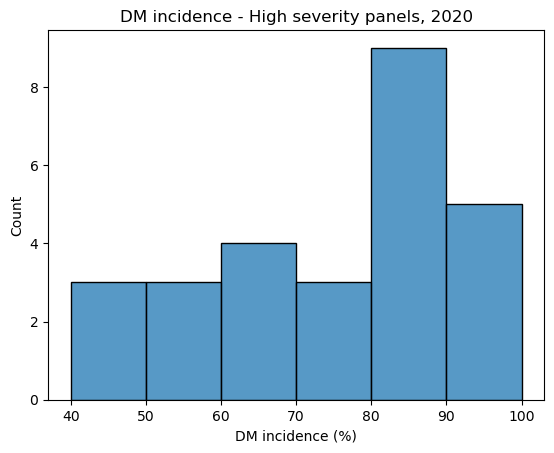

In [8]:
sns.histplot(data=high_sev_20, x='DM_inc')
plt.xlabel('DM incidence (%)')
plt.ylabel('Count')
plt.title('DM incidence - High severity panels, 2020')

In [9]:
# What is the minimum incidence in the HIGH severity category?
high_sev_20.DM_inc.min()

40.0

In [10]:
# What is the max. incidence in the LOW severity category?
low_sev_20.DM_inc.max()

80.0

In [11]:
# Check distributions of EVI by incidence rather than severity - do these means separate?

data_20['inc_class'] = 'low'
data_20.loc[data_20['DM_inc'] >= 60, 'inc_class'] = 'high'

In [49]:
data_20

,acquired,plot,blue,green,red,nir,row,panel,Date,Treatment,...,geometry,centroid,PM_inc,DM_inc,ndvi,evi,savi,gcc,arvi,inc_class
0,20200618,1,0.040044,0.077491,0.071216,0.353575,1,1,2020-06-18,5.0,...,POLYGON ((-77.0152645742787 42.878300949250196...,POINT (-77.0153084903025 42.8783140936145),0.0,0.0,0.664702,0.476784,0.457984,0.410546,0.550895,low
1,20200618,2,0.044693,0.081807,0.077133,0.336587,1,2,2020-06-18,9.0,...,POLYGON ((-77.01535545427274 42.87831851925121...,POINT (-77.0153965503027 42.87833067861654),0.0,5.0,0.627123,0.442999,0.425929,0.401735,0.508816,low
2,20200618,4,0.040121,0.076396,0.070693,0.343482,1,4,2020-06-18,18.0,...,POLYGON ((-77.01552730426143 42.87835065925314...,POINT (-77.01557007030289 42.87836309362055),0.0,0.0,0.658633,0.464962,0.447599,0.408077,0.544620,low
3,20200618,5,0.034862,0.073497,0.060772,0.358279,1,5,2020-06-18,6.0,...,POLYGON ((-77.01561588425558 42.87836680925413...,POINT (-77.01565649030296 42.878378758622546),0.0,0.0,0.709953,0.508925,0.485566,0.434554,0.610381,low
4,20200618,6,0.039300,0.075070,0.068893,0.337817,1,6,2020-06-18,2.0,...,"POLYGON ((-77.01570014425 42.878381989255075, ...",POINT (-77.01574402030295 42.87839504362453),0.0,0.0,0.661216,0.461615,0.444889,0.409629,0.548540,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,20200812,154,0.033227,0.056373,0.036703,0.367113,10,10,2020-08-13,12.0,...,POLYGON ((-77.01605999902254 42.87867018016665...,POINT (-77.0161013453033 42.878682743632794),0.0,10.0,0.818218,0.617296,0.548358,0.446333,0.802697,low
495,20200812,155,0.029468,0.054482,0.033250,0.364829,10,11,2020-08-13,3.0,...,"POLYGON ((-77.0161457490169 42.8786865901676, ...",POINT (-77.01618532530341 42.878698738634725),0.0,5.0,0.832948,0.617088,0.553813,0.464865,0.815697,low
496,20200812,157,0.028348,0.053731,0.030669,0.392379,10,13,2020-08-13,4.0,...,"POLYGON ((-77.0163147390058 42.87871901016951,...",POINT (-77.01635581030357 42.87873143863867),0.0,10.0,0.855010,0.663065,0.587798,0.476557,0.844889,low
497,20200812,158,0.031935,0.059768,0.037213,0.380077,10,14,2020-08-13,16.0,...,"POLYGON ((-77.0163999390002 42.87873515017044,...",POINT (-77.01644346530357 42.878748438640656),0.0,30.0,0.821645,0.628492,0.560670,0.463617,0.798895,low


Low disease (<60%): 453
High disease (>60%): 46
Proportion: 9.85 : 1


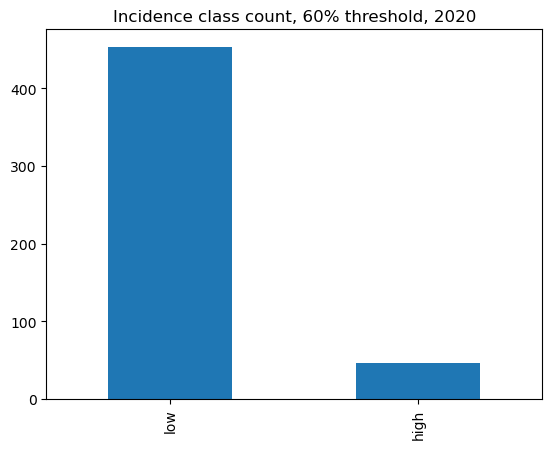

In [12]:
# Visualize data imbalance

target_count = data_20.inc_class.value_counts()
print('Low disease (<60%):', target_count[0])
print('High disease (>60%):', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Incidence class count, 60% threshold, 2020');

Text(0.5, 1.0, 'EVI Distribution by DM Incidence 2020')

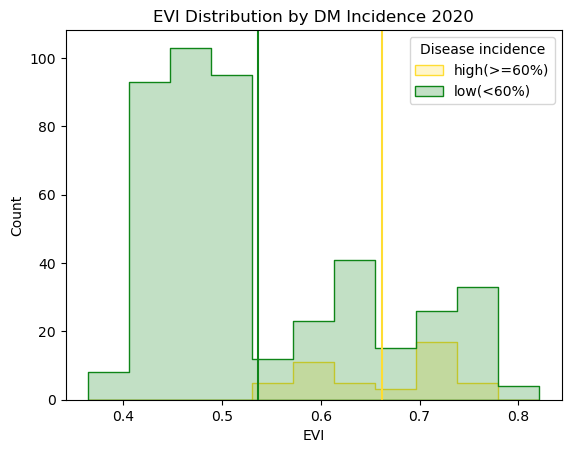

In [13]:
colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=data_20, x="evi", hue="inc_class", element='step')

plt.xlabel('EVI')
plt.ylabel('Count')
plt.legend(title='Disease incidence', loc='upper right', labels=['high(>=60%)', 'low(<60%)'])

# Add lines for mean EVI

#high disease
plt.axvline(x=data_20[data_20['inc_class']=='high'].evi.mean(),
             color="#FFDD33")
# plt.text(0.32, 160, "High disease \nEVI (mean):\n 0.44", horizontalalignment='left', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=data_20[data_20['inc_class']=='low'].evi.mean(),
             color="#0F8518")

# plt.text(0.5, 80, "Low disease \nEVI (mean):\n 0.48", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title('EVI Distribution by DM Incidence 2020')

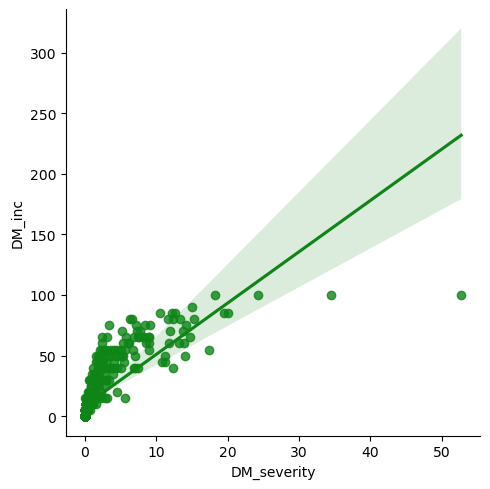

In [14]:
# Is there a relationship between incidence and severity?

sns.lmplot(data=data_20, x="DM_severity", y="DM_inc")

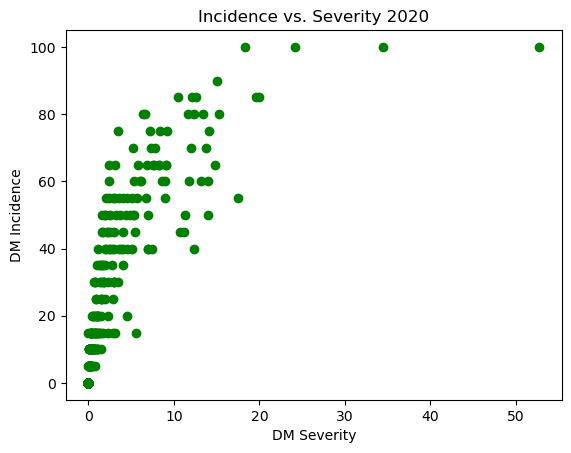

In [15]:

x_values = data_20['DM_severity']
y_values = data_20['DM_inc']

fig, ax = plt.subplots()
#fig.set_dpi(100.0)

ax.scatter(x_values, y_values, c="green", marker="o")

ax.set_xlabel("DM Severity")
ax.set_ylabel("DM Incidence")
ax.set_title("Incidence vs. Severity 2020")
plt.show()

Text(0.5, 1.0, 'DM incidence - Low severity panels, 2021')

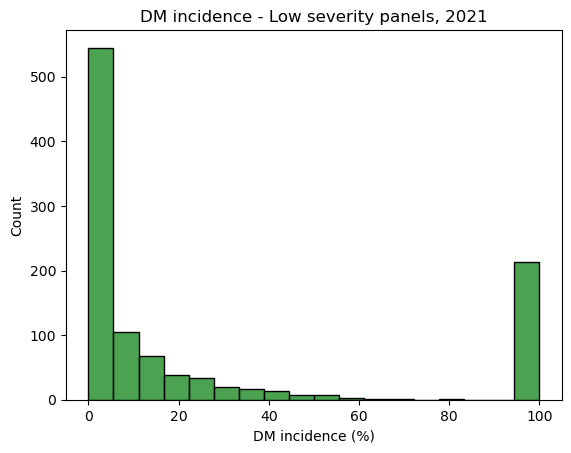

In [16]:
# Try with 2021 and 2022

low_sev_21 = data_21[data_21['DM_severity']<=10]
#low_sev_21.DM_severity.max()
high_sev_21 = data_21[data_21['DM_severity']>10]

sns.histplot(data=low_sev_21, x='DM_inc')
plt.xlabel('DM incidence (%)')
plt.ylabel('Count')
plt.title('DM incidence - Low severity panels, 2021')


Text(0.5, 1.0, 'DM incidence - High severity panels, 2021')

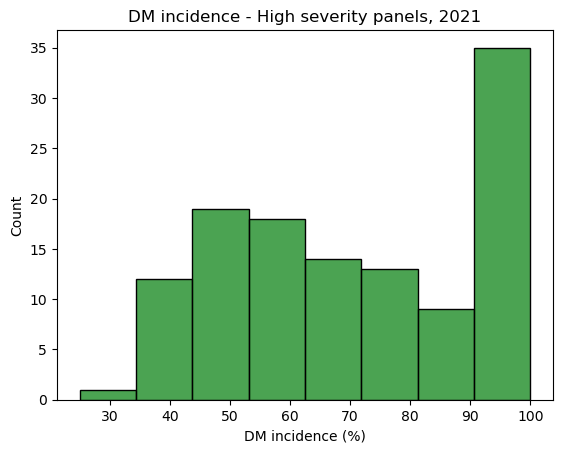

In [17]:
sns.histplot(data=high_sev_21, x='DM_inc')
plt.xlabel('DM incidence (%)')
plt.ylabel('Count')
plt.title('DM incidence - High severity panels, 2021')

In [18]:
# How many panels have high incidence and low severity?

weirdos = data_21[(data_21['DM_severity']<=10)&(data_21['DM_inc']>=80)]

In [19]:
weirdos.shape

(215, 23)

In [20]:
# Use Mann-whitney U test to check if differences are significant
from scipy import stats
def mann_whitney_u_test(distribution_1, distribution_2):
    """
    Perform the Mann-Whitney U Test, comparing two different distributions.
    Args:
       distribution_1: List. 
       distribution_2: List.
    Outputs:
        u_statistic: Float. U statisitic for the test.
        p_value: Float.
    """
    u_statistic, p_value = stats.mannwhitneyu(distribution_1, distribution_2)
    return print("Mann-Whitney U:", u_statistic, "p-value:", p_value)

In [21]:
dist_1 = low_sev_21['evi']
dist_2 = weirdos['evi']

In [22]:
mann_whitney_u_test(dist_1, dist_2)

Mann-Whitney U: 191506.5 p-value: 1.3205670311186341e-52


In [23]:
print('low incidence, low severity EVI:',dist_1.mean())


low incidence, low severity EVI: 0.4461383328119837


In [24]:
print('high incidence, low severity EVI:', dist_2.mean())

high incidence, low severity EVI: 0.36103740441059967


low incidence, low severity EVI: 0.4461383328119837
high incidence, low severity EVI: 0.36103740441059967


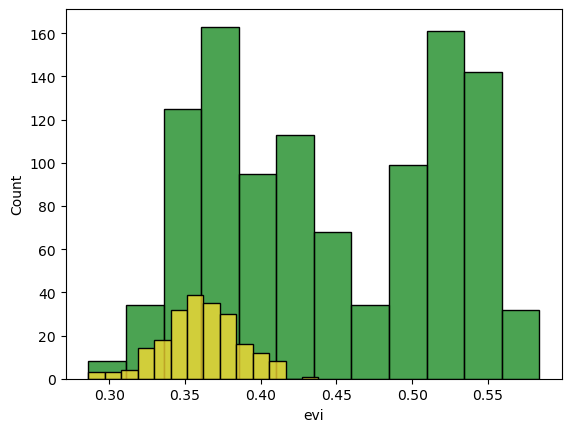

In [25]:
sns.histplot(data=dist_1)
sns.histplot(data=dist_2)
print('low incidence, low severity EVI:',dist_1.mean())
print('high incidence, low severity EVI:', dist_2.mean())

In [26]:
high_sev_dist = high_sev_21['evi']
mann_whitney_u_test(high_sev_dist, dist_2)

Mann-Whitney U: 18746.0 p-value: 1.9050851745467904e-11


In [30]:
# Separate just by incidence (within low severity category) and compare EVI distributions

# 2020 

low_sev_20['DM_inc_group'] = ''

low_sev_20.loc[low_sev_20['DM_inc']<=5,'DM_inc_group']= '0-5'
               
low_sev_20.loc[(low_sev_20['DM_inc']> 5)&(low_sev_20['DM_inc']<=10),'DM_inc_group']='6-10'

low_sev_20.loc[(low_sev_20['DM_inc']> 10)&(low_sev_20['DM_inc']<=20),'DM_inc_group']='11-20'
low_sev_20.loc[(low_sev_20['DM_inc']> 20)&(low_sev_20['DM_inc']<=40),'DM_inc_group']='21-40'
low_sev_20.loc[(low_sev_20['DM_inc']> 40)&(low_sev_20['DM_inc']<=100),'DM_inc_group']='41-80'


/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_1186/3418905538.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_sev_20['DM_inc_group'] = ''
/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_1186/3418905538.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_sev_20[(low_sev_20['DM_inc']> 5)&(low_sev_20['DM_inc']<=10)].DM_inc_group='6-10'


In [40]:
low_sev_20.DM_inc_group.unique()

array(['0-5', '', '6-10', '21-40', '11-20', '41-80'], dtype=object)

<AxesSubplot: xlabel='evi', ylabel='Count'>

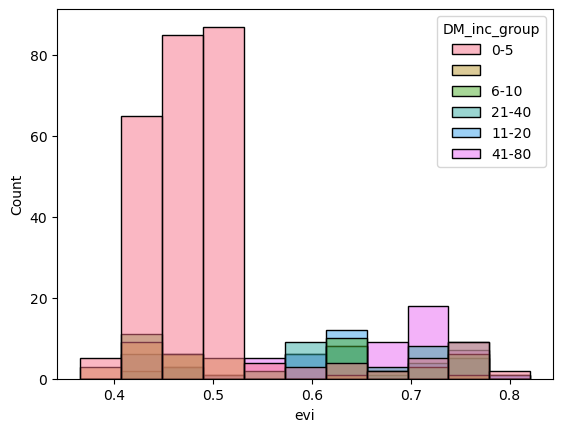

In [41]:
sns.histplot(data=low_sev_20, x="evi", hue="DM_inc_group")

<AxesSubplot: xlabel='evi', ylabel='Count'>

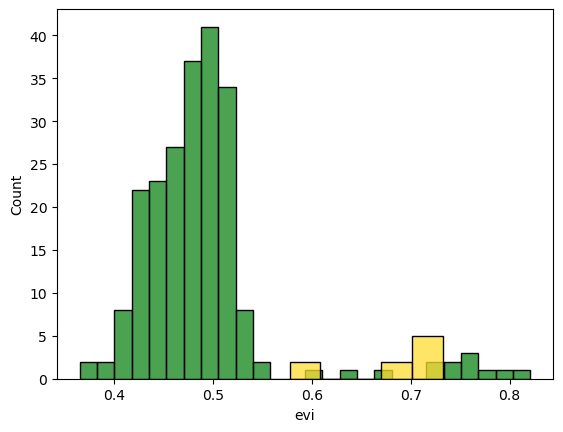

In [53]:
sns.histplot(data=low_sev_20.loc[(low_sev_20['DM_inc']< 5)], x='evi')
sns.histplot(data=low_sev_20.loc[(low_sev_20['DM_inc']>= 70)], x='evi')


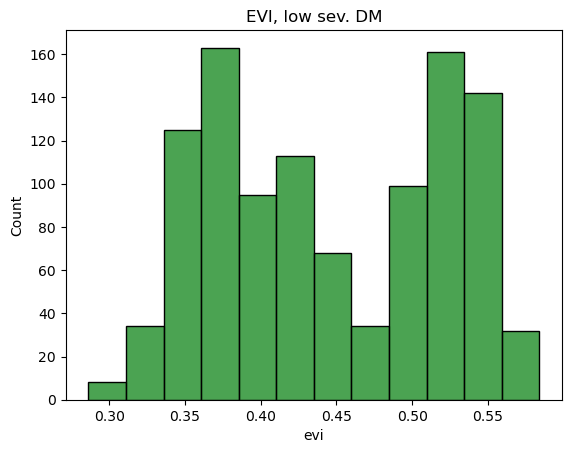

In [56]:
# 2021 - EVI by incidence

sns.histplot(data=low_sev_21, x='evi')
plt.title('EVI, low sev. DM')
plt.show()

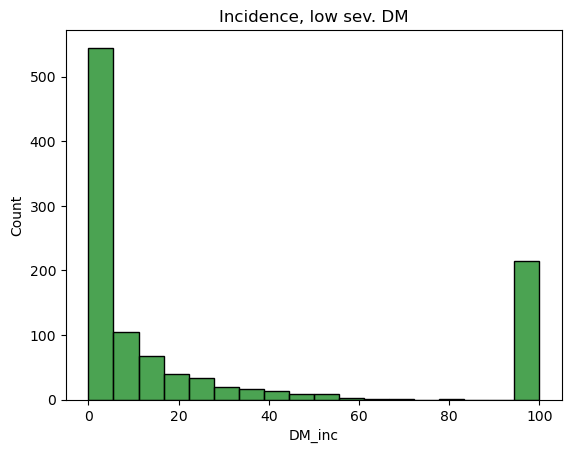

In [57]:
sns.histplot(data=low_sev_21, x='DM_inc')
plt.title('Incidence, low sev. DM')
plt.show()

In [60]:
low_sev_21['DM_inc_group'] = ''

low_sev_21.loc[low_sev_21['DM_inc']<=5,'DM_inc_group']= '0-5'
               
low_sev_21.loc[(low_sev_21['DM_inc']> 5)&(low_sev_21['DM_inc']<=10),'DM_inc_group']='6-10'

low_sev_21.loc[(low_sev_21['DM_inc']> 10)&(low_sev_21['DM_inc']<=20),'DM_inc_group']='11-20'
low_sev_21.loc[(low_sev_21['DM_inc']> 20)&(low_sev_21['DM_inc']<=40),'DM_inc_group']='21-40'
low_sev_21.loc[(low_sev_21['DM_inc']> 40)&(low_sev_21['DM_inc']<=100),'DM_inc_group']='41-100'


/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_1186/417971596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_sev_21['DM_inc_group'] = ''


In [61]:
low_sev_21['DM_inc_group'].unique()

array(['0-5', '6-10', '11-20', '21-40', '41-100'], dtype=object)

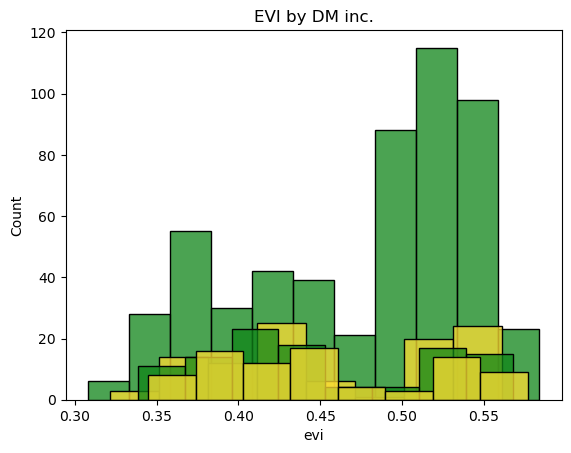

In [66]:
sns.histplot(data=low_sev_21[low_sev_21['DM_inc_group']=='0-5'], x='evi')
sns.histplot(data=low_sev_21[low_sev_21['DM_inc_group']=='6-10'], x='evi')
sns.histplot(data=low_sev_21[low_sev_21['DM_inc_group']=='11-20'], x='evi')
sns.histplot(data=low_sev_21[low_sev_21['DM_inc_group']=='21-40'], x='evi')

plt.title('EVI by DM inc.')
plt.show()

<AxesSubplot: xlabel='evi', ylabel='Count'>

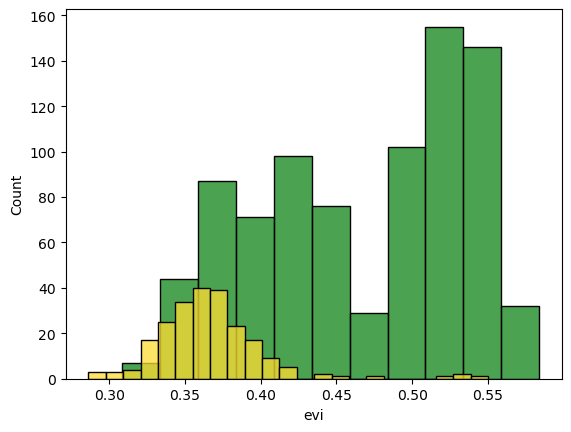

In [71]:
sns.histplot(data=low_sev_21.loc[(low_sev_21['DM_inc']< 50)], x='evi')
sns.histplot(data=low_sev_21.loc[(low_sev_21['DM_inc']>= 50)], x='evi')

In [72]:
low_inc_evi = low_sev_21.loc[(low_sev_21['DM_inc']< 50)].evi
high_inc_evi = low_sev_21.loc[(low_sev_21['DM_inc']>= 50)].evi

In [73]:
mann_whitney_u_test(low_inc_evi, high_inc_evi)

Mann-Whitney U: 171444.0 p-value: 1.3833709824571853e-73


In [74]:
print('EVI, DM incidence < 50%:',low_sev_21.loc[(low_sev_21['DM_inc']< 50)].evi.mean())
print('EVI, DM incidence >= 50%:',low_sev_21.loc[(low_sev_21['DM_inc']>= 50)].evi.mean())


EVI, DM incidence < 50%: 0.46758166681698354
EVI, DM incidence >= 50%: 0.3661273024056624


In [77]:
low_sev_21['inc_50']='low'
low_sev_21.loc[low_sev_21['DM_inc'] >= 50, 'inc_50'] = 'high'

/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_1186/1853664895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_sev_21['inc_50']='low'


Text(0.5, 1.0, 'EVI Distribution by DM Incidence 2021, Low Severity Group')

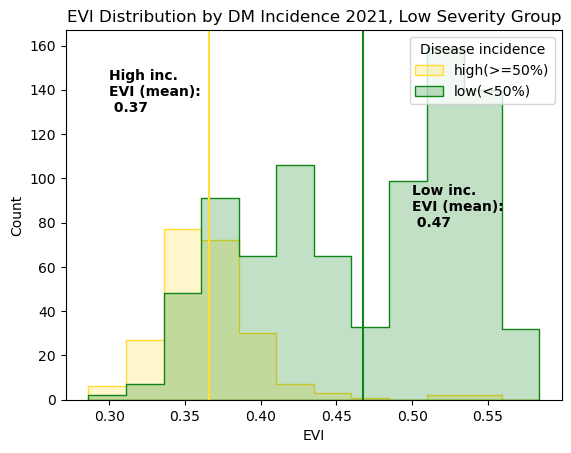

In [83]:
colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=low_sev_21, x="evi", hue="inc_50", element='step')

plt.xlabel('EVI')
plt.ylabel('Count')
plt.legend(title='Disease incidence', loc='upper right', labels=['high(>=50%)', 'low(<50%)'])

# Add lines for mean EVI

#high disease
plt.axvline(x=low_sev_21[low_sev_21['inc_50']=='high'].evi.mean(),
             color="#FFDD33")
plt.text(0.30, 130, "High inc. \nEVI (mean):\n 0.37", horizontalalignment='left', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=low_sev_21[low_sev_21['inc_50']=='low'].evi.mean(),
             color="#0F8518")

plt.text(0.5, 78, "Low inc. \nEVI (mean):\n 0.47", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title('EVI Distribution by DM Incidence 2021, Low Severity Group')

In [84]:
data_21.head()

,acquired,plot,blue,green,red,nir,row,panel,Date,Treatment,...,total_dis,geometry,centroid,PM_inc,DM_inc,ndvi,evi,savi,gcc,arvi
0,20210707,1,0.032006,0.066432,0.040084,0.290003,1,1,2021-07-07,5.0,...,0.05,POLYGON ((-77.0152645742787 42.878300949250196...,POINT (-77.0153084903025 42.8783140936145),0.0,0.0,0.757132,0.484168,0.451614,0.479577,0.715161
1,20210707,2,0.033528,0.067879,0.043324,0.270290,1,2,2021-07-07,7.0,...,0.10,POLYGON ((-77.01535545427274 42.87831851925121...,POINT (-77.0153965503027 42.87833067861654),0.0,0.0,0.723710,0.443716,0.418440,0.469003,0.671497
2,20210707,3,0.033903,0.067897,0.042947,0.273817,1,3,2021-07-07,9.0,...,0.10,POLYGON ((-77.01544069426711 42.87833411925217...,POINT (-77.01548247530272 42.87834674861851),0.0,0.0,0.728841,0.451899,0.423997,0.469072,0.680854
3,20210707,4,0.032868,0.067358,0.042055,0.280455,1,4,2021-07-07,15.0,...,0.60,POLYGON ((-77.01552730426143 42.87835065925314...,POINT (-77.01557007030289 42.87836309362055),0.0,0.0,0.739203,0.463353,0.434767,0.473417,0.691031
4,20210707,5,0.032104,0.066636,0.038836,0.292664,1,5,2021-07-07,3.0,...,0.10,POLYGON ((-77.01561588425558 42.87836680925413...,POINT (-77.01565649030296 42.878378758622546),0.0,0.0,0.765697,0.493868,0.457899,0.484359,0.730553


In [85]:
data_21['DM_inc_50'] = 'low'
data_21.loc[data_21['DM_inc'] >= 50, 'DM_inc_50'] = 'high'

Text(0.5, 1.0, 'EVI Distribution by DM Incidence 2021, All Severity Levels')

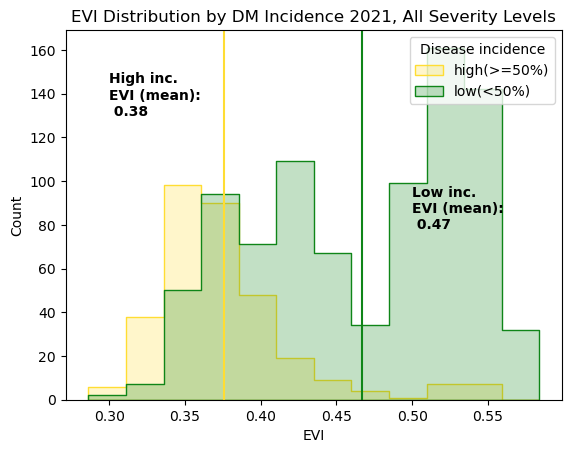

In [90]:
colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=data_21, x="evi", hue="DM_inc_50", element='step')

plt.xlabel('EVI')
plt.ylabel('Count')
plt.legend(title='Disease incidence', loc='upper right', labels=['high(>=50%)', 'low(<50%)'])

# Add lines for mean EVI

#high disease
plt.axvline(x=data_21[data_21['DM_inc_50']=='high'].evi.mean(),
             color="#FFDD33")
plt.text(0.30, 130, "High inc. \nEVI (mean):\n 0.38", horizontalalignment='left', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=data_21[data_21['DM_inc_50']=='low'].evi.mean(),
             color="#0F8518")

plt.text(0.5, 78, "Low inc. \nEVI (mean):\n 0.47", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title('EVI Distribution by DM Incidence 2021, All Severity Levels')

In [87]:
print('EVI, DM incidence < 50%, all severity levels:',data_21.loc[(data_21['DM_inc']< 50)].evi.mean())
print('EVI, DM incidence >= 50%, all severity levels:',data_21.loc[(data_21['DM_inc']>= 50)].evi.mean())


EVI, DM incidence < 50%, all severity levels: 0.46660892970040074
EVI, DM incidence >= 50%, all severity levels: 0.37597956318090103


In [88]:
all_lowinc = data_21.loc[(data_21['DM_inc']< 50)].evi
all_highinc = data_21.loc[(data_21['DM_inc']>= 50)].evi

mann_whitney_u_test(all_lowinc, all_highinc)

Mann-Whitney U: 242015.0 p-value: 5.2185602745334377e-79


In [91]:
# 2022

# First check separation by severity

# Then check by incidence

data_22.head()

,acquired,plot,blue,green,red,nir,row,panel,Date,Treatment,...,total_dis,geometry,centroid,DM_inc,PM_inc,ndvi,evi,savi,gcc,arvi
0,20220622,1,0.058377,0.084667,0.086377,0.367607,1,1,2022-06-22,26.0,...,0.75,POLYGON ((-77.0152645742787 42.878300949250196...,POINT (-77.0153084903025 42.8783140936145),0.0,0.0,0.619472,0.485535,0.442193,0.369047,0.525392
1,20220622,2,0.058603,0.085176,0.088338,0.357583,1,2,2022-06-22,17.0,...,1.05,POLYGON ((-77.01535545427274 42.87831851925121...,POINT (-77.0153965503027 42.87833067861654),0.0,0.0,0.603795,0.464829,0.426957,0.366952,0.503538
2,20220622,3,0.059032,0.086039,0.087004,0.360371,1,3,2022-06-22,31.0,...,0.50,POLYGON ((-77.01544069426711 42.87833411925217...,POINT (-77.01548247530272 42.87834674861851),0.0,0.0,0.611049,0.474712,0.432829,0.370739,0.516248
3,20220622,4,0.057917,0.086170,0.088193,0.365127,1,4,2022-06-22,3.0,...,0.95,POLYGON ((-77.01552730426143 42.87835065925314...,POINT (-77.01557007030289 42.87836309362055),0.0,0.0,0.610900,0.474230,0.435740,0.370975,0.510046
4,20220622,5,0.059172,0.085890,0.089700,0.359786,1,5,2022-06-22,27.0,...,0.80,POLYGON ((-77.01561588425558 42.87836680925413...,POINT (-77.01565649030296 42.878378758622546),0.0,0.0,0.600878,0.464323,0.426683,0.365858,0.499066


In [95]:
print('EVI, DM severity < 10%, all severity levels:',data_22.loc[(data_22['DM_severity']< 10)].evi.mean())
print('EVI, DM severity >= 10%, all severity levels:',data_22.loc[(data_22['DM_severity']>= 10)].evi.mean())


EVI, DM severity < 10%, all severity levels: 0.44598478958639703
EVI, DM severity >= 10%, all severity levels: 0.48086478837316626


Text(0.5, 1.0, 'DM Incidence (%) in low severity panels, 2022')

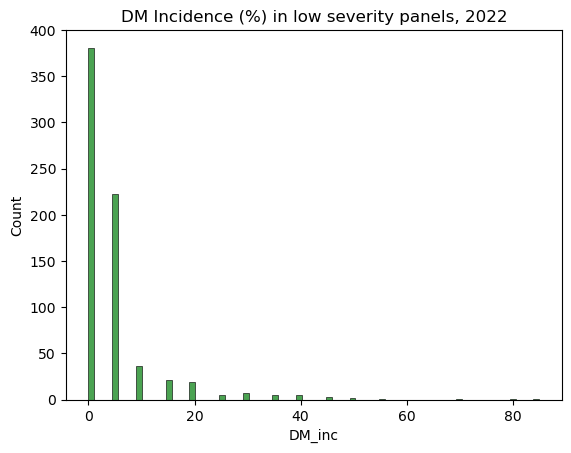

In [97]:
sns.histplot(data=data_22.loc[(data_22['DM_severity']< 10)], x='DM_inc')
plt.title ('DM Incidence (%) in low severity panels, 2022')

Text(0.5, 1.0, 'DM Incidence (%) in high severity panels, 2022')

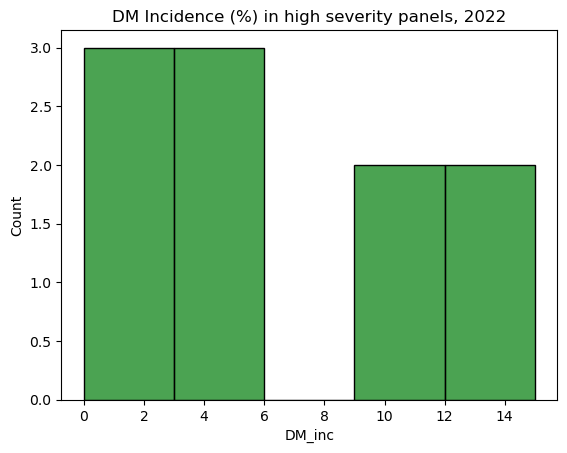

In [100]:
sns.histplot(data=data_22.loc[(data_22['DM_severity']> 10)], x='DM_inc')
plt.title ('DM Incidence (%) in high severity panels, 2022')

In [98]:
print('EVI, DM inc < 50%, all severity levels:',data_22.loc[(data_22['DM_inc']< 50)].evi.mean())
print('EVI, DM inc >= 50%, all severity levels:',data_22.loc[(data_22['DM_inc']>= 50)].evi.mean())


EVI, DM inc < 50%, all severity levels: 0.4460238361494028
EVI, DM inc >= 50%, all severity levels: 0.49947157989999164


In [101]:
data_22.Date.unique()

array(['2022-06-22', '2022-07-06', '2022-07-20'], dtype=object)

In [106]:
data_22['dm_sev_10']='low'
data_22.loc[data_22['DM_severity'] >= 10, 'dm_sev_10'] = 'high'

Low incidence (<50%): 714
High incidence (>50%): 6
Proportion: 119.0 : 1


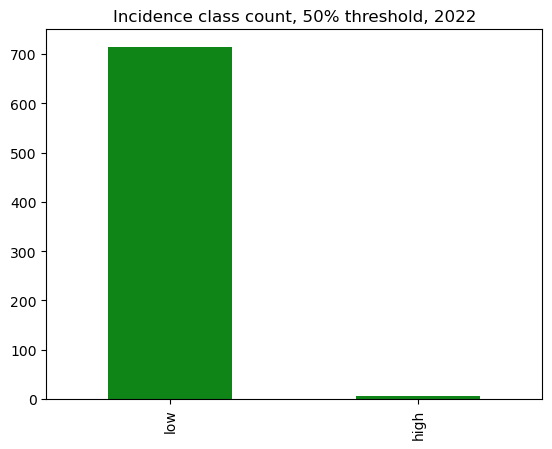

In [105]:
# Visualize data imbalance

target_count = data_22.dm_inc_50.value_counts()
print('Low incidence (<50%):', target_count[0])
print('High incidence (>50%):', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Incidence class count, 50% threshold, 2022');

Low severity (<10%): 710
High severity (>10%): 10
Proportion: 71.0 : 1


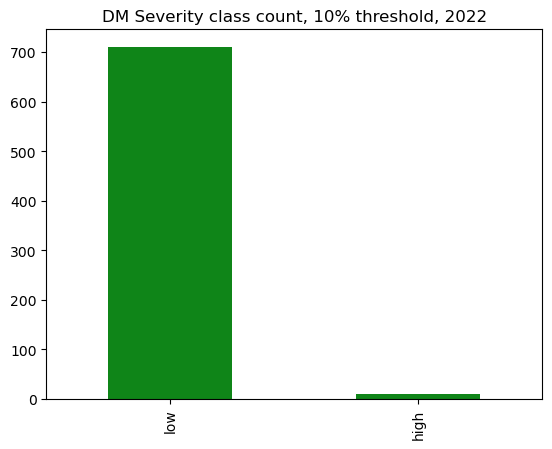

In [107]:
# Visualize data imbalance

target_count = data_22.dm_sev_10.value_counts()
print('Low severity (<10%):', target_count[0])
print('High severity (>10%):', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='DM Severity class count, 10% threshold, 2022');

Text(0.5, 1.0, 'EVI Distribution by DM Severity 2022')

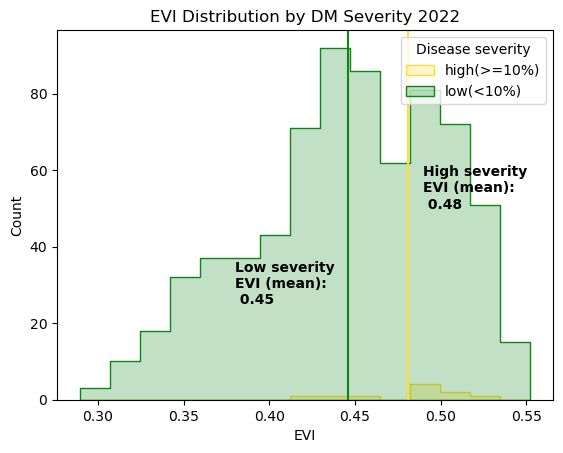

In [121]:
colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=data_22, x="evi", hue="dm_sev_10", element='step')

plt.xlabel('EVI')
plt.ylabel('Count')
plt.legend(title='Disease severity', loc='upper right', labels=['high(>=10%)', 'low(<10%)'])

# Add lines for mean EVI

#high disease
plt.axvline(x=data_22[data_22['dm_sev_10']=='high'].evi.mean(),
             color="#FFDD33")
plt.text(0.49, 50, "High severity \nEVI (mean):\n 0.48", horizontalalignment='left', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=data_22[data_22['dm_sev_10']=='low'].evi.mean(),
             color="#0F8518")

plt.text(0.38, 25, "Low severity \nEVI (mean):\n 0.45", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title('EVI Distribution by DM Severity 2022')

In [109]:
print('Low severity EVI mean 2022:', data_22[data_22['dm_sev_10']=='low'].evi.mean())
print('High severity EVI mean 2022:', data_22[data_22['dm_sev_10']=='high'].evi.mean())


Low severity EVI mean 2022: 0.44598478958639703
High severity EVI mean 2022: 0.48086478837316626


In [122]:
mann_whitney_u_test(data_22[data_22['dm_sev_10']=='low'].evi, data_22[data_22['dm_sev_10']=='high'].evi)

Mann-Whitney U: 2266.0 p-value: 0.04940002903420305


Text(0.5, 1.0, 'EVI Distribution by DM Incidence 2022')

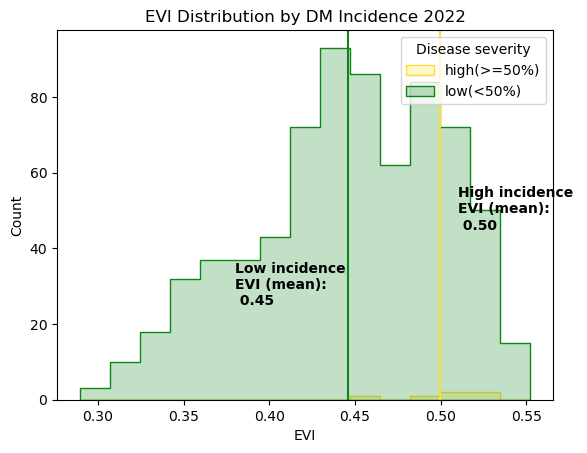

In [129]:
colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=data_22, x="evi", hue="dm_inc_50", element='step')

plt.xlabel('EVI')
plt.ylabel('Count')
plt.legend(title='Disease severity', loc='upper right', labels=['high(>=50%)', 'low(<50%)'])

# Add lines for mean EVI

#high disease
plt.axvline(x=data_22[data_22['dm_inc_50']=='high'].evi.mean(),
             color="#FFDD33")
plt.text(0.51, 45, "High incidence \nEVI (mean):\n 0.50", horizontalalignment='left', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=data_22[data_22['dm_inc_50']=='low'].evi.mean(),
             color="#0F8518")

plt.text(0.38, 25, "Low incidence \nEVI (mean):\n 0.45", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title('EVI Distribution by DM Incidence 2022')

In [125]:
print('Low inc EVI mean 2022:', data_22[data_22['dm_inc_50']=='low'].evi.mean())
print('High inc EVI mean 2022:', data_22[data_22['dm_inc_50']=='high'].evi.mean())


Low inc EVI mean 2022: 0.4460238361494028
High inc EVI mean 2022: 0.49947157989999164


In [130]:
mann_whitney_u_test(data_22[data_22['dm_inc_50']=='low'].evi, data_22[data_22['dm_inc_50']=='high'].evi)

Mann-Whitney U: 855.0 p-value: 0.008585155192890923
